Ahmed Abdo Amin Abdo \
Ahmed Abd Ellatife Mohamed Salah Eldine \
Alaa Tohamy Mohamed AbdElwahab \
Sherif Mohamed Abdelaziz Ahmed \


Take five different samples of Gutenberg digital books (or your choice of text corpus), which are of five different authors, that you suspect are of the same genres and are semantically the same. For example, choose two of the books 1- The Brothers Karamazov and 2- Thus Spoke Zarathustra. ...5- 

###Fiction
1. melville-moby_dick.txt
2. chesterton-ball.txt
3. austen-emma.txt
4. bryant-stories.txt
5. edgeworth-parents.txt



In [1]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
import pandas as pd
import re
import numpy as np
nltk.download("gutenberg")
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier # knn classifier
import seaborn as sns
import wordcloud
import mlxtend.evaluate
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from mlxtend.evaluate import bias_variance_decomp
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
names = ["melville-moby_dick.txt", "chesterton-ball.txt", "austen-emma.txt", "bryant-stories.txt", "edgeworth-parents.txt"]
Authors = ['Herman Melville', 'G.K. Chesterton' , 'Jane Austen' , 'Sara Cone Bryant' , 'Maria Edgeworth']
#emma = nltk.corpus.gutenberg.words('bryant-stories.txt')
#emma

##Preprocessing and Data Cleansing Cleaning data 

In [5]:
library = []
for i in names:
  book = list(nltk.corpus.gutenberg.words(i))
  for w in range(len(book)):
    book[w] = ''.join(re.findall("[A-Za-z]", book[w]))
  tmp = []
  for w in range(len(book)):
    if book[w]!='':
      tmp.append(book[w])
  book = tmp
  library.append(book)
book

['The',
 'Parent',
 's',
 'Assistant',
 'by',
 'Maria',
 'Edgeworth',
 'THE',
 'ORPHANS',
 'Near',
 'the',
 'ruins',
 'of',
 'the',
 'castle',
 'of',
 'Rossmore',
 'in',
 'Ireland',
 'is',
 'a',
 'small',
 'cabin',
 'in',
 'which',
 'there',
 'once',
 'lived',
 'a',
 'widow',
 'and',
 'her',
 'four',
 'children',
 'As',
 'long',
 'as',
 'she',
 'was',
 'able',
 'to',
 'work',
 'she',
 'was',
 'very',
 'industrious',
 'and',
 'was',
 'accounted',
 'the',
 'best',
 'spinner',
 'in',
 'the',
 'parish',
 'but',
 'she',
 'overworked',
 'herself',
 'at',
 'last',
 'and',
 'fell',
 'ill',
 'so',
 'that',
 'she',
 'could',
 'not',
 'sit',
 'to',
 'her',
 'wheel',
 'as',
 'she',
 'used',
 'to',
 'do',
 'and',
 'was',
 'obliged',
 'to',
 'give',
 'it',
 'up',
 'to',
 'her',
 'eldest',
 'daughter',
 'Mary',
 'Mary',
 'was',
 'at',
 'this',
 'time',
 'about',
 'twelve',
 'years',
 'old',
 'One',
 'evening',
 'she',
 'was',
 'sitting',
 'at',
 'the',
 'foot',
 'of',
 'her',
 'mother',
 's',
 'bed',

In [6]:
c=stopwords.words('english')
new_library = []
for book in library:
  newbook=[]
  for i in book:
    if i not in c:
      newbook.append(i)
  new_library.append(newbook)
library = new_library

### text 

In [7]:
split_lists=[]
import random
for i in library:
  temp = []
  for x in range(200):
    temp.append(' '.join(i[x*100:x*100+100]).lower())
  split_lists = split_lists + temp

### Book Name

In [8]:
titles=[] 
for name in names:
  for i in range(200):
    titles.append(name[:-4])

### Authors Names 

In [9]:
Author=[]
for a in Authors:
  for l in range(200): 
    Author.append(a[:-4])

### Data Frame 

In [10]:
mydataset= pd.DataFrame()
mydataset['The sentences']=split_lists
mydataset['Book Name']= titles
mydataset['Author Name']= Author
# mydataset.sample(5)
mydataset

,The sentences,Book Name,Author Name
0,moby dick herman melville etymology supplied l...,melville-moby_dick,Herman Melv
1,greek cetus latin whoel anglo saxon hvalt dani...,melville-moby_dick,Herman Melv
2,fancied sung leviathan many nations generation...,melville-moby_dick,Herman Melv
3,ye strike splintered hearts together ye shall ...,melville-moby_dick,Herman Melv
4,whirlpooles called balaene take much length fo...,melville-moby_dick,Herman Melv
...,...,...,...
995,pains learn could write neat legible hand foun...,edgeworth-parents,Maria Edgew
996,bits paper writing bills father came bill hand...,edgeworth-parents,Maria Edgew
997,ever scold susan without wrong last as soon se...,edgeworth-parents,Maria Edgew
998,good boys put visit lamb went immediately brot...,edgeworth-parents,Maria Edgew


### Books Visualization 

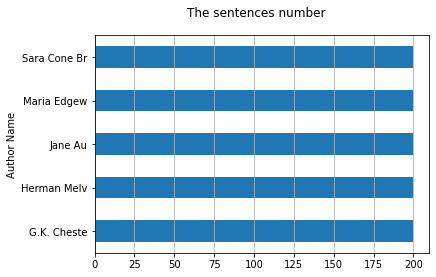

In [11]:
x = "Author Name"
fig, ax = plt.subplots()
fig.suptitle("The sentences number", fontsize=12)
mydataset[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### Transforming the prediction target (Author Name)

In [12]:
# convert Author Name column from string into number
lbl = LabelEncoder()
mydataset['Author Name'] = lbl.fit_transform(mydataset['Author Name'])
y = mydataset['Author Name'].to_numpy()
# remove dubplication of Author Name column
lst = mydataset['Author Name'].drop_duplicates()
# convert it into one-dimensional array
lst_namesOfBook = list(np.array(lst.values.tolist()).reshape(-1))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##Feature Engineering

In [14]:
allSentences = mydataset['The sentences']
allSentences = list(allSentences)

###Feature extraction

####BOW

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_BOW = vectorizer.fit(allSentences)
X_features_BOW = X_BOW.vocabulary_
X_BOW = vectorizer.transform(allSentences)
X_BOW = list(X_BOW.toarray())
X_BOW = np.array(X_BOW)
display(pd.DataFrame(X_BOW, columns=X_features_BOW))
'''for i in range(len(allSentences)):
  print(X_BOW[i])'''

,moby,dick,herman,melville,etymology,supplied,late,consumptive,usher,grammar,...,paled,cited,emulous,youngsters,wicket,troup,hatchway,establish,observation,ninepins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'for i in range(len(allSentences)):\n  print(X_BOW[i])'

#### N-Gram

In [16]:
vectorizer_ngram = CountVectorizer(ngram_range = (2, 2))
X_n_gram = vectorizer_ngram.fit(allSentences)
X_features_nGram = X_n_gram.vocabulary_
X_n_gram = vectorizer_ngram.transform(allSentences)
X_n_gram = list(X_n_gram.toarray())
X_nGram = np.array(X_n_gram)
display(pd.DataFrame(X_nGram, columns=X_features_nGram))

,moby dick,dick herman,herman melville,melville etymology,etymology supplied,supplied late,late consumptive,consumptive usher,usher grammar,grammar school,...,bows arrows,arrows suddenly,music heard,heard crowd,crowd silenced,silenced the,the music,seemed near,near spot,spot children
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####TFiDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
VecModel_TFiDF = TfidfVectorizer()
X_TFiDF_Vec = VecModel_TFiDF.fit(allSentences)
X_TFiDF_features = X_TFiDF_Vec.vocabulary_
X_TFiDF_Vec = VecModel_TFiDF.transform(allSentences)
print(type(X_TFiDF_Vec))
X_TFiDF_Vec = pd.DataFrame.sparse.from_spmatrix(X_TFiDF_Vec,columns=X_TFiDF_features)
print(f'The new Shape for X_TFiDF_Vec is {X_TFiDF_Vec.shape}')
print(f'the features of X_TFiDF_Vec are: {X_TFiDF_features}')
df_TFiDF = X_TFiDF_Vec
display(X_TFiDF_Vec)
X_TFiDF_Vec = X_TFiDF_Vec.to_numpy()

<class 'scipy.sparse.csr.csr_matrix'>
The new Shape for X_TFiDF_Vec is (1000, 12202)
the features of X_TFiDF_Vec are: {'moby': 6775, 'dick': 2940, 'herman': 5061, 'melville': 6627, 'etymology': 3699, 'supplied': 10508, 'late': 6084, 'consumptive': 2272, 'usher': 11522, 'grammar': 4682, 'school': 9237, 'the': 10802, 'pale': 7452, 'threadbare': 10875, 'coat': 1960, 'heart': 4993, 'body': 1170, 'brain': 1269, 'see': 9339, 'he': 4970, 'ever': 3713, 'dusting': 3340, 'old': 7267, 'lexicons': 6187, 'grammars': 4683, 'queer': 8411, 'handkerchief': 4870, 'mockingly': 6777, 'embellished': 3494, 'gay': 4503, 'flags': 4126, 'known': 5998, 'nations': 6987, 'world': 12095, 'loved': 6350, 'dust': 3339, 'somehow': 9943, 'mildly': 6694, 'reminded': 8714, 'mortality': 6846, 'while': 11914, 'take': 10645, 'hand': 4866, 'others': 7338, 'teach': 10704, 'name': 6958, 'whale': 11876, 'fish': 4101, 'called': 1487, 'tongue': 11004, 'leaving': 6146, 'ignorance': 5351, 'letter': 6178, 'almost': 308, 'alone': 310

,moby,dick,herman,melville,etymology,supplied,late,consumptive,usher,grammar,...,paled,cited,emulous,youngsters,wicket,troup,hatchway,establish,observation,ninepins
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.087502,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.089299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Display 
for i in range(5):
  print(sorted(list(df_TFiDF.iloc[i,:]), reverse = True)[:20])

[0.23622795798425053, 0.23622795798425053, 0.23622795798425053, 0.22295365042090995, 0.19249094895153065, 0.1642941855287638, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527, 0.11811397899212527]
[0.4025362057942944, 0.36386769003856717, 0.263564406321903, 0.2012681028971472, 0.16400382262513208, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736, 0.1006340514485736]
[0.3532035116954571, 0.21864113819417708, 0.18323341640508256, 0.13024624551123723, 0.13024624551123723, 0.13024624551123723, 0.13024624551123723, 0.13024624551123723, 0.13024624

###Feature Selection

In [19]:
print("Before features reduction")
print(f'BOW : {X_BOW.shape}')
print(f'N-Gram : {X_nGram.shape}')
print(f'TFiDF : {X_TFiDF_Vec.shape}')
fS = SelectPercentile(score_func= chi2, percentile=20)
X_BOW = fS.fit_transform(X_BOW,y)
X_nGram = fS.fit_transform(X_nGram,y)
X_TFiDF_Vec = fS.fit_transform(X_TFiDF_Vec,y)
print("After features reduction")
print(f'BOW : {X_BOW.shape}')
print(f'N-Gram : {X_nGram.shape}')
print(f'TFiDF : {X_TFiDF_Vec.shape}')

Before features reduction
BOW : (1000, 12202)
N-Gram : (1000, 80676)
TFiDF : (1000, 12202)
After features reduction
BOW : (1000, 2441)
N-Gram : (1000, 16135)
TFiDF : (1000, 2441)


In [20]:
#columns = np.asarray(X_BOW.columns.values)
support = np.asarray(fS.get_support())
support
#columns_with_support = columns[support]

array([False, False, False, ..., False, False, False])

###Data splitting

In [21]:
# Create training and test sets
X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(X_BOW, y, test_size = 0.33, random_state=53)

In [22]:
# Create training and test sets
X_train_nGram, X_test_nGram, y_train_nGram, y_test_nGram = train_test_split(X_nGram, y, test_size = 0.33, random_state=53)

In [23]:
# Create training and test sets
X_train_TFiDF, X_test_TFiDF, y_train_TFiDF, y_test_TFiDF = train_test_split(X_TFiDF_Vec, y, test_size = 0.33)

##Modeling

###SVM With BOW

In [23]:

def SVM_Model (X_test , y_test,  X_train , y_train ) :
  svm = SVC(kernel = 'rbf', random_state=0)
  results = svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  acc = metrics.accuracy_score(y_pred , y_test)
  print("f1-score:",acc)
  print(f'-------------------------\nclassification report:\n-------------------------\n')
  CR = classification_report(y_test, y_pred, labels=lst_namesOfBook)
  print(CR)
  # conviction matrix foe SVM
  print(f'-------------------------\nConfusion Matrix:\n-------------------------\n')
  conf_mx = confusion_matrix(y_test, y_pred , labels=svm.classes_)
 
  row_sums = conf_mx.sum(axis=1, keepdims=True)
  norm_confx_mx = conf_mx / row_sums
        # replace all TP with zeros
  np.fill_diagonal(norm_confx_mx, 0)
  ax = sns.heatmap(conf_mx, annot=True, cmap='Purples')    
  plt.show()
  print('Error Analysis')
  ax1 = sns.heatmap(norm_confx_mx, annot=True, cmap='Purples')
  plt.show()
  
  # cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
  # disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
  # disp.plot()
  # plt.show()
  return svm, acc, CR, conf_mx
  

In [24]:
# calculate mes, bais, varience and cross validation
def calPerformance(model, X_train, y_train, X_test, y_test):
  scores = cross_val_score(model, X_train, y_train, cv=10)
  mse, bias, var=bias_variance_decomp(model ,X_train,y_train,X_test,y_test,loss='mse', num_rounds=200, random_seed=1)
  print('MSE: %.3f' % mse)
  print("Bias:%.3f"%bias)
  print("Variance:%.3f"%var)
  print(f"cross validation :{scores}")
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
  return mse, bias, var,scores

BOW with SVM
f1-score: 0.9727272727272728
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        65
           0       0.97      1.00      0.98        62
           2       1.00      1.00      1.00        74
           4       0.95      0.94      0.95        67
           3       1.00      0.95      0.98        62

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

-------------------------
Confusion Matrix:
-------------------------



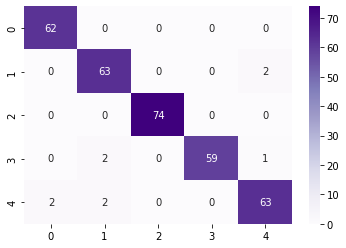

Error Analysis


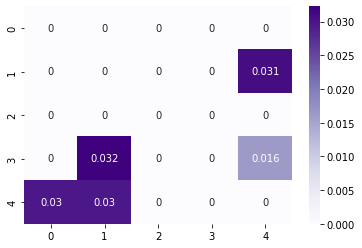

MSE: 0.344
Bias:0.254
Variance:0.090
cross validation :[0.98507463 0.97014925 0.98507463 0.94029851 0.97014925 0.95522388
 0.98507463 0.97014925 0.92537313 1.        ]
0.97 accuracy with a standard deviation of 0.02


In [25]:
print("BOW with SVM")
SVMBOW, accSVMBOW, CRSVMBOW, conf_mxSVMBOW = SVM_Model(X_test_BOW , y_test_BOW , X_train_BOW , y_train_BOW)
mse_SVMWithBOW, bias_SVMWithBOW, var_SVMWithBOW ,CV_SVM_BOW=calPerformance(SVMBOW, X_train_BOW, y_train_BOW, X_test_BOW, y_test_BOW)

###SVM With N-Gram

N-Gram with SVM
f1-score: 0.7818181818181819
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.57      0.85      0.68        65
           0       0.84      0.66      0.74        62
           2       1.00      0.85      0.92        74
           4       0.82      0.75      0.78        67
           3       0.82      0.79      0.80        62

    accuracy                           0.78       330
   macro avg       0.81      0.78      0.78       330
weighted avg       0.81      0.78      0.79       330

-------------------------
Confusion Matrix:
-------------------------



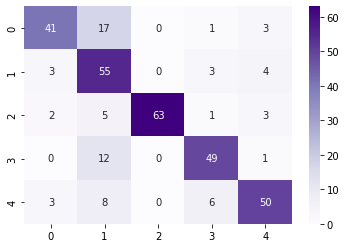

Error Analysis


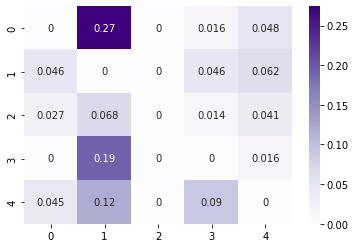

MSE: 1.290
Bias:1.014
Variance:0.276
cross validation :[0.68656716 0.74626866 0.68656716 0.64179104 0.70149254 0.74626866
 0.79104478 0.8358209  0.58208955 0.73134328]
0.71 accuracy with a standard deviation of 0.07


In [26]:
print("N-Gram with SVM") 
SVMNGram, accSVMNGram, CRSVMNGram, SVMNGramconf_mx = SVM_Model(X_test_nGram , y_test_nGram , X_train_nGram , y_train_nGram)
mse_SVMWithNGram, bias_SVMWithNGram, var_SVMWithNGram,CV_SVM_NG= calPerformance(SVMNGram, X_train_nGram, y_train_nGram, X_test_nGram, y_test_nGram)

###SVM With TFiDF

TFiDF with SVM
f1-score: 0.9878787878787879
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        62
           0       1.00      0.98      0.99        60
           2       1.00      1.00      1.00        67
           4       1.00      0.97      0.99        68
           3       1.00      0.99      0.99        73

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

-------------------------
Confusion Matrix:
-------------------------



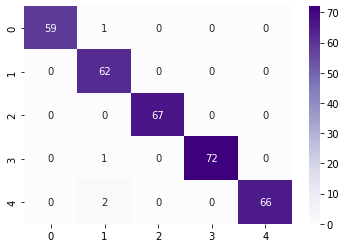

Error Analysis


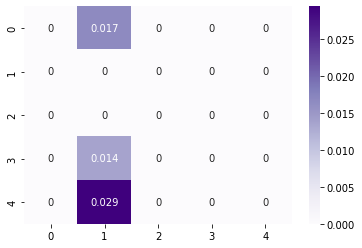

MSE: 0.131
Bias:0.084
Variance:0.047
cross validation :[1.         0.98507463 0.94029851 0.98507463 0.97014925 1.
 0.97014925 0.94029851 0.97014925 1.        ]
0.98 accuracy with a standard deviation of 0.02


In [41]:
print("TFiDF with SVM") 
SVMTFiDF, accSVMWithTFiDF, CRSVMWithTFiD, conf_mxSVMWithTFiD = SVM_Model(X_test_TFiDF , y_test_TFiDF , X_train_TFiDF , y_train_TFiDF)
mse_SVMWithTFiDF, bias_SVMWithTFiDF, var_SVMWithTFiDF,CV_SVM_TF= calPerformance(SVMTFiDF, X_train_TFiDF, y_train_TFiDF, X_test_TFiDF, y_test_TFiDF)

### Decision Tree With BOW

In [28]:
def Decision_Tree (X_test , y_test,  X_train , y_train ):#, features ) :
  # Create Decision Tree classifer object
  dt = DecisionTreeClassifier(criterion="entropy")
  # Train Decision Tree Classifer
  dt_mo = dt.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = dt.predict(X_test)

  '''# Decision Tree Visualization 
  feature_cols = list(features.keys())
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  graph.write_png('diabetes.png')'''
  # Model Accuracy, how often is the classifier correct?
  print ('Decision Tree')
  print("f1-score:",metrics.accuracy_score( y_test,y_pred))
  print(f'-------------------------\nclassification report:\n-------------------------\n')
  print(classification_report(y_test, y_pred, labels=lst_namesOfBook))
  # conviction matrix foe SVM
  print(f'-------------------------\nConfusion Matrix:\n-------------------------\n')
  conf_mx = confusion_matrix(y_test, y_pred , labels=dt.classes_)
 
  row_sums = conf_mx.sum(axis=1, keepdims=True)
  norm_confx_mx = conf_mx / row_sums
        # replace all TP with zeros
  np.fill_diagonal(norm_confx_mx, 0)
  ax = sns.heatmap(conf_mx, annot=True, cmap='Purples')    
  plt.show()
  print('Error Analysis')
  ax1 = sns.heatmap(norm_confx_mx, annot=True, cmap='Purples')
  plt.show()
  return dt
  

Decision Tree
f1-score: 0.796969696969697
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.69      0.72      0.71        65
           0       0.77      0.79      0.78        62
           2       0.93      0.89      0.91        74
           4       0.81      0.76      0.78        67
           3       0.78      0.81      0.79        62

    accuracy                           0.80       330
   macro avg       0.80      0.79      0.79       330
weighted avg       0.80      0.80      0.80       330

-------------------------
Confusion Matrix:
-------------------------



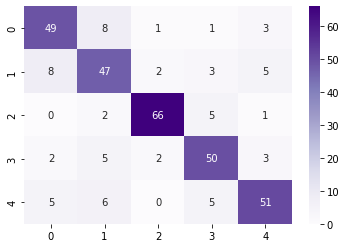

Error Analysis


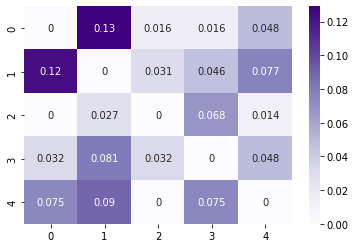

MSE: 1.163
Bias:0.449
Variance:0.714
cross validation :[0.70149254 0.80597015 0.82089552 0.7761194  0.79104478 0.79104478
 0.7761194  0.89552239 0.76119403 0.7761194 ]
0.79 accuracy with a standard deviation of 0.05


In [29]:
dt = Decision_Tree (X_test_BOW , y_test_BOW , X_train_BOW , y_train_BOW)# ,X_features_BOW )
mse_DTWithBOW, bias_DTWithBOW, var_DTWithBOW,scores = calPerformance(dt, X_train_BOW, y_train_BOW, X_test_BOW, y_test_BOW)

### Decision Tree With N-Gram

Decision Tree
f1-score: 0.6909090909090909
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.43      0.88      0.58        65
           0       0.92      0.56      0.70        62
           2       0.96      0.88      0.92        74
           4       0.76      0.58      0.66        67
           3       0.80      0.52      0.63        62

    accuracy                           0.69       330
   macro avg       0.77      0.68      0.70       330
weighted avg       0.78      0.69      0.70       330

-------------------------
Confusion Matrix:
-------------------------



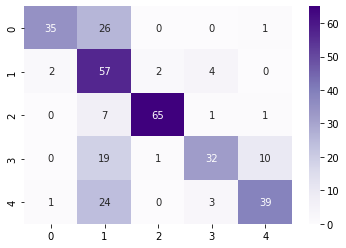

Error Analysis


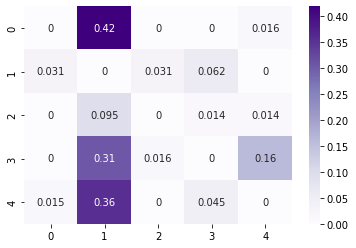

MSE: 1.513
Bias:1.052
Variance:0.461
cross validation :[0.62686567 0.70149254 0.64179104 0.68656716 0.59701493 0.71641791
 0.68656716 0.74626866 0.55223881 0.67164179]
0.66 accuracy with a standard deviation of 0.06


In [30]:
dt = Decision_Tree(X_test_nGram , y_test_nGram , X_train_nGram , y_train_nGram)# ,X_features_nGram )
mse_DTWithNGram, bias_DTWithNGram, var_DTWithNGram,scores = calPerformance(dt, X_train_nGram, y_train_nGram, X_test_nGram, y_test_nGram)

### Decision Tree With TFiDF

Decision Tree
f1-score: 0.7787878787878788
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.66      0.71      0.68        62
           0       0.73      0.78      0.76        60
           2       0.88      0.87      0.87        67
           4       0.74      0.74      0.74        68
           3       0.89      0.79      0.84        73

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330

-------------------------
Confusion Matrix:
-------------------------



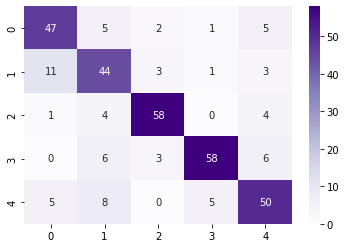

Error Analysis


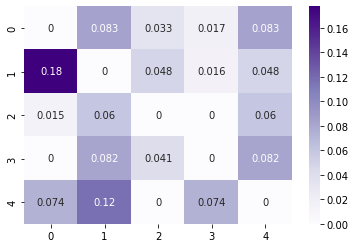

MSE: 1.307
Bias:0.451
Variance:0.856
cross validation :[0.79104478 0.76119403 0.67164179 0.70149254 0.67164179 0.46268657
 0.8358209  0.70149254 0.65671642 0.7761194 ]
0.70 accuracy with a standard deviation of 0.10


In [31]:
Decision_Tree (X_test_TFiDF , y_test_TFiDF , X_train_TFiDF , y_train_TFiDF)# ,X_TFiDF_features )
mse_DTWithTFiDF, bias_DTWithTFiDF, var_DTWithTFiD, scores = calPerformance(dt, X_train_TFiDF, y_train_TFiDF, X_test_TFiDF, y_test_TFiDF)

### knearest neighbors With BOW

In [32]:
def knn_model (X_test , y_test,  X_train , y_train) : 

  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=3)

  #Train the model using the training sets
  knn_mo=knn.fit(X_train,y_train)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test)
  # Model Accuracy, how often is the classifier correct?
  print ('KNN Model ')
  print("f1-score:",metrics.accuracy_score(y_pred , y_test))
  print(f'-------------------------\nclassification report:\n-------------------------\n')
  print(classification_report(y_test, y_pred, labels=lst_namesOfBook))
   # conviction matrix foe SVM
  print(f'-------------------------\nConfusion Matrix:\n-------------------------\n')
  conf_mx = confusion_matrix(y_test, y_pred , labels=knn.classes_)
 
  row_sums = conf_mx.sum(axis=1, keepdims=True)
  norm_confx_mx = conf_mx / row_sums
        # replace all TP with zeros
  np.fill_diagonal(norm_confx_mx, 0)
  ax = sns.heatmap(conf_mx, annot=True, cmap='Purples')    
  plt.show()
  print('Error Analysis')
  ax1 = sns.heatmap(norm_confx_mx, annot=True, cmap='Purples')
  plt.show()
  return knn

KNN Model 
f1-score: 0.7090909090909091
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.48      1.00      0.65        65
           0       0.64      0.69      0.67        62
           2       0.98      0.77      0.86        74
           4       1.00      0.51      0.67        67
           3       1.00      0.56      0.72        62

    accuracy                           0.71       330
   macro avg       0.82      0.71      0.71       330
weighted avg       0.83      0.71      0.72       330

-------------------------
Confusion Matrix:
-------------------------



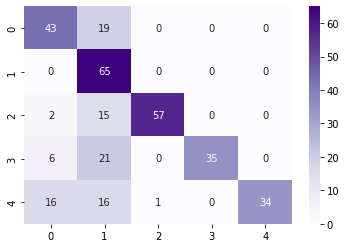

Error Analysis


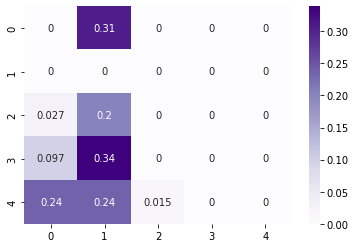

MSE: 1.767
Bias:1.180
Variance:0.588
cross validation :[0.62686567 0.73134328 0.65671642 0.70149254 0.62686567 0.68656716
 0.67164179 0.82089552 0.6119403  0.56716418]
0.67 accuracy with a standard deviation of 0.07


In [33]:
knn= knn_model(X_test_BOW , y_test_BOW , X_train_BOW , y_train_BOW)
mse_KNNWithBOW, bias_KNNWithBOW, var_KNNWithBOW, scores = calPerformance(knn, X_train_BOW, y_train_BOW, X_test_BOW, y_test_BOW)

### knearest neighbors With N-Gram

KNN Model 
f1-score: 0.24848484848484848
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.21      1.00      0.34        65
           0       0.00      0.00      0.00        62
           2       1.00      0.11      0.20        74
           4       1.00      0.10      0.19        67
           3       1.00      0.03      0.06        62

    accuracy                           0.25       330
   macro avg       0.64      0.25      0.16       330
weighted avg       0.66      0.25      0.16       330

-------------------------
Confusion Matrix:
-------------------------



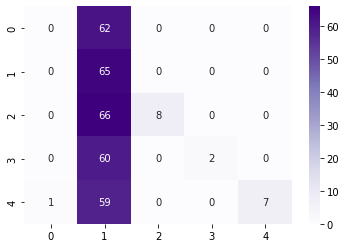

Error Analysis


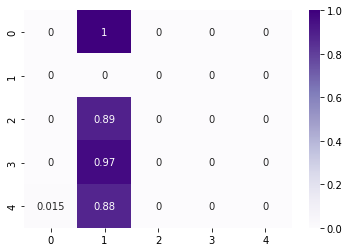

MSE: 2.834
Bias:2.576
Variance:0.258
cross validation :[0.23880597 0.2238806  0.23880597 0.26865672 0.23880597 0.23880597
 0.20895522 0.28358209 0.2238806  0.2238806 ]
0.24 accuracy with a standard deviation of 0.02


In [34]:
knn =knn_model(X_test_nGram , y_test_nGram , X_train_nGram , y_train_nGram)
mse_KNNWithNGram, bias_KNNWithNGram, var_KNNWithNGram, scores = calPerformance(knn, X_train_nGram, y_train_nGram, X_test_nGram, y_test_nGram)

### knearest neighbors With TFiDF

KNN Model 
f1-score: 0.5121212121212121
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.28      1.00      0.44        62
           0       0.80      0.27      0.40        60
           2       1.00      0.13      0.24        67
           4       1.00      0.54      0.70        68
           3       1.00      0.62      0.76        73

    accuracy                           0.51       330
   macro avg       0.82      0.51      0.51       330
weighted avg       0.83      0.51      0.52       330

-------------------------
Confusion Matrix:
-------------------------



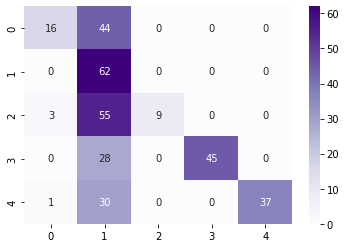

Error Analysis


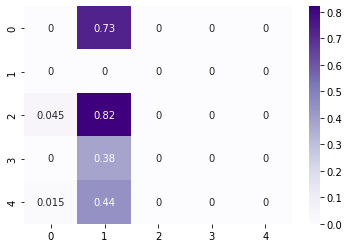

MSE: 1.710
Bias:1.053
Variance:0.656
cross validation :[0.52238806 0.59701493 0.6119403  0.49253731 0.59701493 0.50746269
 0.73134328 0.47761194 0.53731343 0.46268657]
0.55 accuracy with a standard deviation of 0.08


In [35]:
knn = knn_model(X_test_TFiDF , y_test_TFiDF , X_train_TFiDF , y_train_TFiDF)
mse_KNNWithTFiDF, bias_KNNWithTFiDF, var_KNNWithTFiDF, scores = calPerformance(knn, X_train_TFiDF, y_train_TFiDF, X_test_TFiDF, y_test_TFiDF)

## Visualization

In [36]:
def DisplayMostRepeating(X_features):
  wc = wordcloud.WordCloud(background_color='white', max_words=100, 
                         max_font_size=35)
  wc = wc.generate(str(X_features))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

###BOW

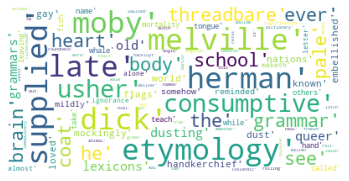

In [37]:
DisplayMostRepeating(X_features_BOW)

###N-Gram

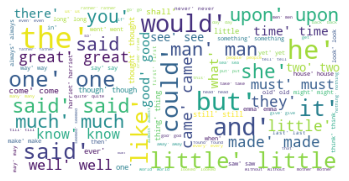

In [38]:
DisplayMostRepeating(X_features_nGram)

###TFiDF

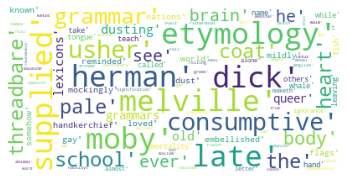

In [39]:
DisplayMostRepeating(X_TFiDF_features)

## Display bais and variance for All models to choose the champion model.

In [42]:
print("SVM With BOW")
print(f'MSE: {mse_SVMWithBOW}, Bias: {bias_SVMWithBOW} ,variance: {var_SVMWithBOW}')
print("SVM With NGram")
print(f'MSE: {mse_SVMWithNGram}, Bias: {bias_SVMWithNGram} ,variance: {var_SVMWithNGram}')
print("SVM With TFiDF")
print(f'MSE: {mse_SVMWithTFiDF}, Bias: {bias_SVMWithTFiDF} ,variance: {var_SVMWithTFiDF}')
print("------------------------------------------------------------------")
print("Decision Tree With BOW")
print(f'MSE: {mse_DTWithBOW}, Bias: {bias_DTWithBOW} ,variance: {var_DTWithBOW}')
print("Decision Tree  With NGram")
print(f'MSE: {mse_DTWithNGram}, Bias: {bias_DTWithNGram} ,variance: {var_DTWithNGram}')
print("Decision Tree  With TFiDF")
print(f'MSE: {mse_DTWithTFiDF}, Bias: {bias_DTWithTFiDF} ,variance: {var_DTWithTFiD}')
print("------------------------------------------------------------------")
print("knearest neighbors With BOW")
print(f'MSE: {mse_KNNWithBOW}, Bias: {bias_KNNWithBOW} ,variance: {var_KNNWithBOW}')
print("knearest neighbors  With NGram")
print(f'MSE: {mse_KNNWithNGram}, Bias: {bias_KNNWithNGram} ,variance: {var_KNNWithNGram}')
print("knearest neighbors  With TFiDF")
print(f'MSE: {mse_KNNWithTFiDF}, Bias: {bias_KNNWithTFiDF} ,variance: {var_KNNWithTFiDF}')

SVM With BOW
MSE: 0.34365151515151515, Bias: 0.25384704545454545 ,variance: 0.08980446969696969
SVM With NGram
MSE: 1.2903636363636364, Bias: 1.014047575757576 ,variance: 0.2763160606060606
SVM With TFiDF
MSE: 0.13095454545454546, Bias: 0.08378234848484849 ,variance: 0.04717219696969697
------------------------------------------------------------------
Decision Tree With BOW
MSE: 1.163469696969697, Bias: 0.44921113636363635 ,variance: 0.7142585606060606
Decision Tree  With NGram
MSE: 1.5129393939393938, Bias: 1.0519763636363637 ,variance: 0.4609630303030303
Decision Tree  With TFiDF
MSE: 1.3069848484848483, Bias: 0.4508496212121212 ,variance: 0.8561352272727272
------------------------------------------------------------------
knearest neighbors With BOW
MSE: 1.7673787878787879, Bias: 1.1796011363636363 ,variance: 0.5877776515151516
knearest neighbors  With NGram
MSE: 2.833772727272727, Bias: 2.576157045454546 ,variance: 0.2576156818181818
knearest neighbors  With TFiDF
MSE: 1.70962121

##the champion model (SVM With TFiDF)

SVM With TFiDF
------------
Accuracy: 0.9878787878787879

classification report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        62
           0       1.00      0.98      0.99        60
           2       1.00      1.00      1.00        67
           4       1.00      0.97      0.99        68
           3       1.00      0.99      0.99        73

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

MSE: 0.13095454545454546, Bias: 0.08378234848484849 ,variance: 0.04717219696969697
-------------------------
Confusion Matrix:
-------------------------



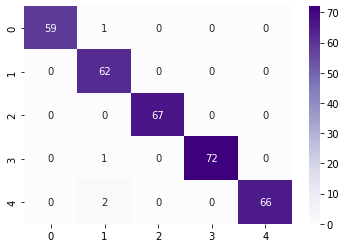

Error Analysis


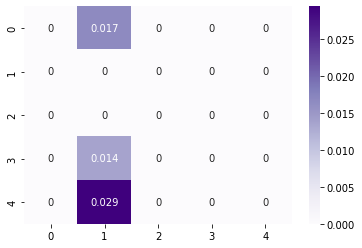

In [43]:
print("SVM With TFiDF\n------------")
print(f'Accuracy: {accSVMWithTFiDF}')
print(f'\nclassification report:\n {CRSVMWithTFiD}')
print(f'MSE: {mse_SVMWithTFiDF}, Bias: {bias_SVMWithTFiDF} ,variance: {var_SVMWithTFiDF}')
print(f'-------------------------\nConfusion Matrix:\n-------------------------\n')
row_sums = conf_mxSVMWithTFiD.sum(axis=1, keepdims=True)
norm_confx_mx = conf_mxSVMWithTFiD / row_sums
# replace all TP with zeros
np.fill_diagonal(norm_confx_mx, 0)
ax = sns.heatmap(conf_mxSVMWithTFiD, annot=True, cmap='Purples')    
plt.show()
print('Error Analysis')
ax1 = sns.heatmap(norm_confx_mx, annot=True, cmap='Purples')
plt.show()

##Learning curve for champion model

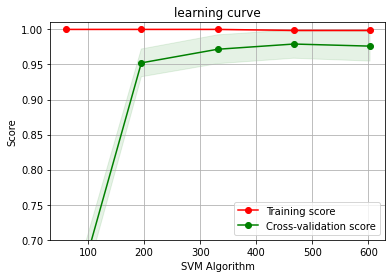

In [44]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(SVMTFiDF, X_train_TFiDF, y_train_TFiDF, cv=10, scoring='accuracy', n_jobs=4)
plt.figure()
plt.title("learning curve")

plt.ylim(*(0.7, 1.01))
plt.xlabel("SVM Algorithm")
plt.ylabel("Score")
    
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show()
  

 


##The accuracy down for about 20% with its bias and variability



In [45]:
lst = mydataset['The sentences'].map(lambda x: " ".join(x.split(" ")[:20]))

In [46]:
VecModel_TFiDF = TfidfVectorizer()
X_TFiDF = VecModel_TFiDF.fit(lst)
X_TFiDF_features = X_TFiDF.vocabulary_
X_TFiDF = VecModel_TFiDF.transform(lst)
print(type(X_TFiDF))
X_TFiDF = pd.DataFrame.sparse.from_spmatrix(X_TFiDF,columns=X_TFiDF_features)
print(f'The new Shape for X_TFiDF_Vec is {X_TFiDF.shape}')
print(f'the features of X_TFiDF_Vec are: {X_TFiDF_features}')
df_TFiDF = X_TFiDF
display(X_TFiDF)
X_TFiDF = X_TFiDF.to_numpy()

<class 'scipy.sparse.csr.csr_matrix'>
The new Shape for X_TFiDF_Vec is (1000, 5333)
the features of X_TFiDF_Vec are: {'moby': 2945, 'dick': 1249, 'herman': 2196, 'melville': 2888, 'etymology': 1555, 'supplied': 4575, 'late': 2624, 'consumptive': 970, 'usher': 5015, 'grammar': 2013, 'school': 4004, 'the': 4711, 'pale': 3246, 'threadbare': 4755, 'coat': 844, 'heart': 2155, 'body': 506, 'brain': 544, 'greek': 2041, 'cetus': 717, 'latin': 2625, 'whoel': 5197, 'anglo': 176, 'saxon': 3986, 'hvalt': 2307, 'danish': 1116, 'wal': 5093, 'dutch': 1421, 'hwal': 2308, 'swedish': 4609, 'whale': 5156, 'icelandic': 2312, 'english': 1512, 'baleine': 351, 'french': 1860, 'ballena': 354, 'spanish': 4342, 'fancied': 1658, 'sung': 4566, 'leviathan': 2678, 'many': 2819, 'nations': 3044, 'generations': 1931, 'including': 2373, 'so': 4288, 'fare': 1663, 'thee': 4712, 'well': 5151, 'poor': 3465, 'devil': 1240, 'sub': 4530, 'whose': 5200, 'commentator': 879, 'thou': 4745, 'belongest': 432, 'ye': 5313, 'strike':

,moby,dick,herman,melville,etymology,supplied,late,consumptive,usher,grammar,...,spring,playtime,unwonted,villager,dominion,deservedly,scholar,dame,cited,succeeding
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_train_TFiDFR, X_test_TFiDFR, y_train_TFiDFR, y_test_TFiDFR = train_test_split(X_TFiDF, y, test_size = 0.33)

TFiDF with SVM
f1-score: 0.7757575757575758
-------------------------
classification report:
-------------------------

              precision    recall  f1-score   support

           1       0.57      0.91      0.70        68
           0       0.91      0.56      0.69        75
           2       0.85      0.83      0.84        53
           4       0.88      0.84      0.85        67
           3       0.87      0.78      0.82        67

    accuracy                           0.78       330
   macro avg       0.81      0.78      0.78       330
weighted avg       0.82      0.78      0.78       330

-------------------------
Confusion Matrix:
-------------------------



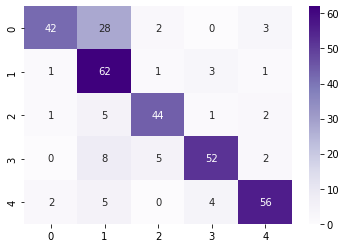

Error Analysis


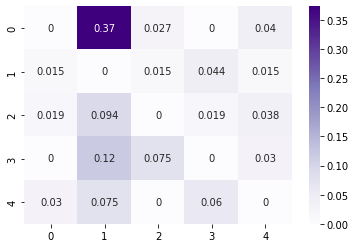

MSE: 1.139
Bias:0.625
Variance:0.514
cross validation :[0.74626866 0.8358209  0.80597015 0.82089552 0.68656716 0.82089552
 0.79104478 0.8358209  0.74626866 0.79104478]
0.79 accuracy with a standard deviation of 0.05


In [48]:
print("TFiDF with SVM") 
SVMTFiDF, accSVMWithTFiDF, CRSVMWithTFiD, conf_mxSVMWithTFiD = SVM_Model(X_test_TFiDFR , y_test_TFiDFR , X_train_TFiDFR , y_train_TFiDFR)
mse_DTWithTFiDF, bias_DTWithTFiDF, var_DTWithTFiD, scores = calPerformance(SVMTFiDF, X_train_TFiDFR, y_train_TFiDFR, X_test_TFiDFR, y_test_TFiDFR)

In [27]:
nd = np.array(list(X_TFiDF_features))
nd.shape

(12202,)

##RL with LSTM

In [24]:
#model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


embedding_vector_features=len(X_TFiDF_features)

model=keras.Sequential()

model.add(keras.layers.Embedding(2441,embedding_vector_features,input_length=2441))

model.add(keras.layers.LSTM(64,input_shape=(X_TFiDF_Vec.shape),activation='relu',return_sequences=True))

model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.LSTM(128,activation='relu'))

# model.add(keras.layers.Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

# model.add(keras.layers.Dense(32,activation='relu'))

# model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2441, 12202)       29785082  
                                                                 
 lstm (LSTM)                 (None, 2441, 64)          3140352   
                                                                 
 dropout (Dropout)           (None, 2441, 64)          0         
                                                                 
 dense (Dense)               (None, 2441, 4)           260       
                                                                 
Total params: 32,925,694
Trainable params: 32,925,694
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#X_test_TFiDF, y_test_TFiDF , X_train_TFiDF , y_train_TFiDF
model.fit(X_train_TFiDF,y_train_TFiDF,validation_data=(X_test_TFiDF,y_test_TFiDF),epochs=120,batch_size=64)

In [ ]:
results = model.evaluate(X_test_TFiDF,y_test_TFiDF)

In [ ]:
y_pred = model.predict(X_TFiDF_features)

In [ ]:
y_pred